# Principal Component Analysis

Principal Component Analysis (PCA) is used to achieve dimensionality reduction without much loss of information about the dataset, using the projected versions of data points onto the few directions, that we call the principal directions, that can explain most of the spread/variance in the dataset.

Considering `N` features and `M` data points/observations $\bm{x}_k$ for $k = 0, 1, \ldots, (M-1)$, we evaluate the covariance matrix of the dataset as:

$$\bm{R} = \frac{1}{M-1} \sum_{k=0}^{M-1} (\bm{x}_k - \bm{\mu})(\bm{x}_k - \bm{\mu})^{\top}$$

$$\text{where, } \bm{\mu} = \frac{1}{M} \sum_{k=0}^{M-1} \bm{x}_k$$

is the average of the data.

Now, if we consider unit vector $\bm{\hat{p}}$ to be a principal direction, then the variance along this direction is:

$$\sigma_{\text{proj }\bm{\hat{p}}} = \frac{1}{M-1} \sum_{k=0}^{M-1} ||\bm{\hat{p}}^{\top}(\bm{x}_k - \bm{\mu})||^2$$

$$\text{or, }\sigma_{\text{proj }\bm{\hat{p}}} = \frac{1}{M-1} \sum_{k=0}^{M-1} \bm{\hat{p}}^{\top}(\bm{x}_k - \bm{\mu})(\bm{x}_k - \bm{\mu})^{\top}\bm{\hat{p}}$$

$$\text{or, } \sigma_{\text{proj }\bm{\hat{p}}} = \bm{\hat{p}}^{\top}\bm{R} \space \bm{\hat{p}}$$

Thus, we can now formulate the optimization problem as:

$$\bm{\hat{p}}_{\text{max}} = \text{argmax } \bm{p}^{\top}\bm{R} \space \bm{p} \\ \text{subject to constraint: } ||\bm{p}||^2 = \bm{p}^{\top}\bm{p} = 1$$

Using, KKT conditions, the principal direction is identified as eigenvector of $\bm{R}$ corresponding to largest eigenvalue, as follows:

$$\bm{\hat{p}}_{\text{max}} \text{ is such that, } \bm{R} \space \bm{\hat{p}}_{\text{max}} = \lambda_{\text{max}} \space \bm{\hat{p}}_{\text{max}}$$

Now, identifying $\bm{R}$ as:

$$\bm{R} = \sum_{k=0}^{M-1} \left(\frac{1}{\sqrt{M-1}}(\bm{x}_k - \bm{\mu})\right)\left(\frac{1}{\sqrt{M-1}}(\bm{x}_k - \bm{\mu})^{\top}\right)$$

$$\bm{R} = \left( \frac{1}{\sqrt{M-1}} \begin{bmatrix} \bm{x}_0^\top \\ \vdots \\ \bm{x}_{M-1}^\top \end{bmatrix} \right)^\top \left( \frac{1}{\sqrt{M-1}} \begin{bmatrix} \bm{x}_0^\top \\ \vdots \\ \bm{x}_{M-1}^\top \end{bmatrix} \right)$$

$$\text{Here we identify, } \bm{X} = \frac{1}{\sqrt{M-1}} \begin{bmatrix} \bm{x}_0^\top \\ \vdots \\ \bm{x}_{M-1}^\top \end{bmatrix} \text{ as our dataset, scaled by a factor of }(M-1)^{-\frac{1}{2}}$$

From our (scaled) dataset $\bm{X}$'s SVD, we get the eigenvector matrix of $\bm{R}$ as:

$$\bm{X} = \bm{U \space \Sigma \space V}^\top$$
$$\bm{R} = \bm{X}^\top\bm{X} = \bm{V} \space (\bm{\Sigma}^\top \bm{\Sigma}) \space \bm{V}^\top = \bm{V} \space \bm{\Lambda} \space \bm{V}^\top $$

Thus, `L` principal directions with largest eigen-values correspond to first `L` column vectors $\bm{v}_j \text{, } j=0,1,\ldots, (L-1)$ of eigenvector matrix $\bm{V}$.
So, the projection of data point $\bm{x}_k$ along those `L` principal directions are calculated as:

$$\bm{\tilde{x}}_k = \begin{bmatrix} \bm{v}_0^\top \\ \bm{v}_1^\top \\ \vdots \\\bm{v}_{L-1}^\top \end{bmatrix} \bm{x}_k$$
$$\bm{\tilde{x}}_k = \bm{\tilde{V}}^\top\bm{x}_k \space\text{ where, } \bm{\tilde{V}} = [\bm{v}_0\space\bm{v}_1\space\cdots\space\bm{v}_{L-1}]_{N \times L}$$

In [3]:
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets

In [4]:
dataset = datasets.load_diabetes().data

In [15]:
dataset.shape
# Here, M = 442, N = 10

(442, 10)

<Axes: >

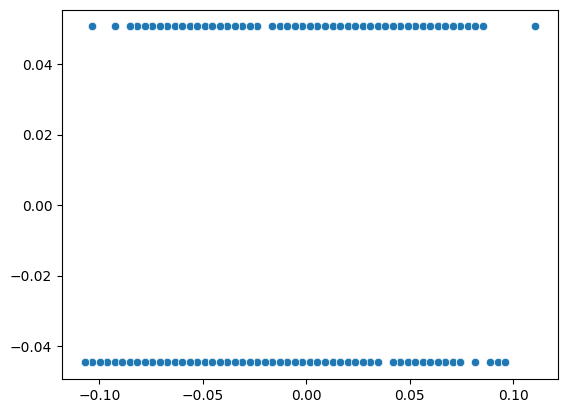

In [46]:
sns.scatterplot(x=dataset[:,0], y=dataset[:,1])

In [18]:
X = dataset * (np.sqrt(1/(dataset.shape[0])))

In [19]:
U, S, Vh = np.linalg.svd(X)

In [25]:
U.shape, S.shape, Vh.shape # Vh is transpose of V

((442, 442), (10,), (10, 10))

In [45]:
S

array([0.09541776, 0.05810584, 0.05223438, 0.04649421, 0.03870592,
       0.03692713, 0.03484178, 0.03132381, 0.01331145, 0.00440093])

In [43]:
V = Vh.T
principal_X = dataset @ V[:,0:2] # use only first two principal column vector/directions
principal_X.shape

(442, 2)

<Axes: >

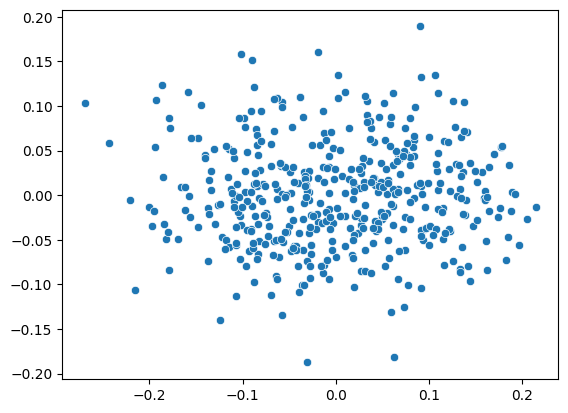

In [44]:
sns.scatterplot(x=principal_X[:,0], y=principal_X[:,1])

In [73]:
target = datasets.load_diabetes().target
target.sort()
unique_values = [target[0]]
for i in range(1,len(target)):
    if (target[i] != unique_values[len(unique_values)-1]):
        unique_values.append(target[i])
print("Length of target array:",len(target))
print("Number of unique values in it:", len(unique_values))

Length of target array: 442
Number of unique values in it: 214


In [72]:
#confirming with scikit-learn's PCA
from sklearn.decomposition import PCA

8.03781375294231e-18
-5.0236335955889435e-18


<Axes: >

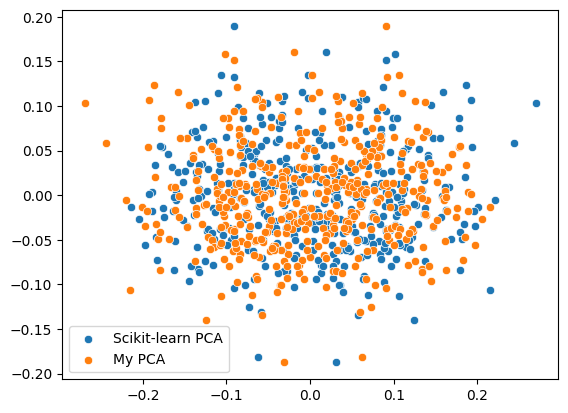

In [123]:
pca = PCA(n_components=2)
Xp = pca.fit(dataset).transform(dataset)
#Xp is centered column wise, principal_X is not, let's do that as well
mean = np.mean(principal_X, axis=0)
principal_X[:,0] = principal_X[:,0] - mean[0]
principal_X[:,1] = principal_X[:,1] - mean[1]

print(np.mean(Xp[:,0]))
print(np.mean(principal_X[:,0]))

sns.scatterplot(x=Xp[:,0], y=Xp[:,1], label="Scikit-learn PCA")
sns.scatterplot(x=principal_X[:,0], y=principal_X[:,1], label="My PCA")

Apparently, currently, the implementation of `PCA` in `sklearn` has bugs in it currently, and it negates some principal directions' vectors as can be observed below, leading me to explore and find out that this is still an open issue on scikit-learn's GitHub repository.

I have also added my own observations as a comment on the open issue, that you find here:

[`sklearn` PCA rotates a single vector #27620](https://github.com/scikit-learn/scikit-learn/issues/27620)

Checking the scikit-learn documentation, it mentions that:
> It uses the **LAPACK** implementation of the full SVD or a randomized truncated SVD by the method of *Halko et al. 2009*, depending on the shape of the input data and the number of components to extract. It can also use the `scipy.sparse.linalg` **ARPACK** implementation of the truncated SVD.

In [103]:
pca.components_.T

array([[ 0.2164309 ,  0.04436721],
       [ 0.18696688, -0.3865472 ],
       [ 0.30316216, -0.15628128],
       [ 0.27173773, -0.138266  ],
       [ 0.34325511,  0.57302691],
       [ 0.35186068,  0.45594185],
       [-0.28243681,  0.50623907],
       [ 0.4288337 , -0.06818072],
       [ 0.37861802, -0.026187  ],
       [ 0.32218296, -0.08494884]])

In [104]:
V[:,0:2]

array([[-0.2164309 ,  0.04436721],
       [-0.18696688, -0.3865472 ],
       [-0.30316216, -0.15628128],
       [-0.27173773, -0.138266  ],
       [-0.34325511,  0.57302691],
       [-0.35186068,  0.45594185],
       [ 0.28243681,  0.50623907],
       [-0.4288337 , -0.06818072],
       [-0.37861802, -0.026187  ],
       [-0.32218296, -0.08494884]])